In [3]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")

In [4]:
df=pd.read_csv("MSFT.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


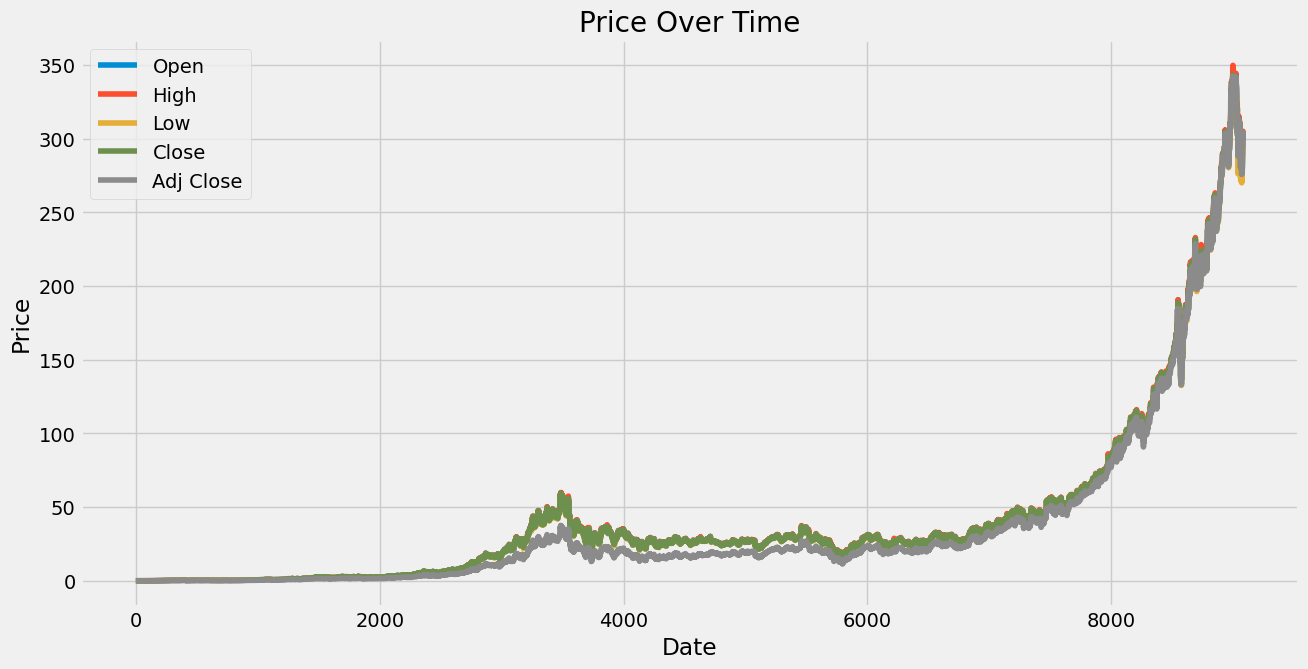

In [5]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Open'], label='Open')
plt.plot(df.index, df['High'], label='High')
plt.plot(df.index, df['Low'], label='Low')
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['Adj Close'], label='Adj Close')
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

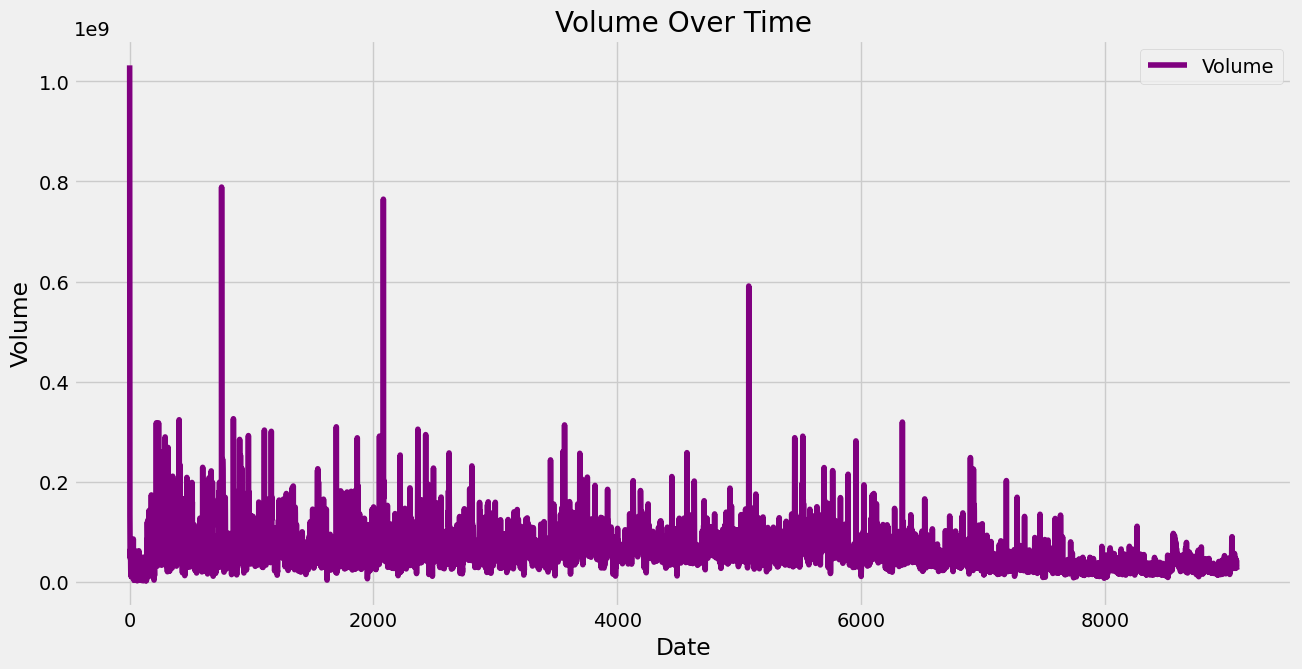

In [6]:
# Volume Over Time
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Volume'], label='Volume', color='purple')
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()



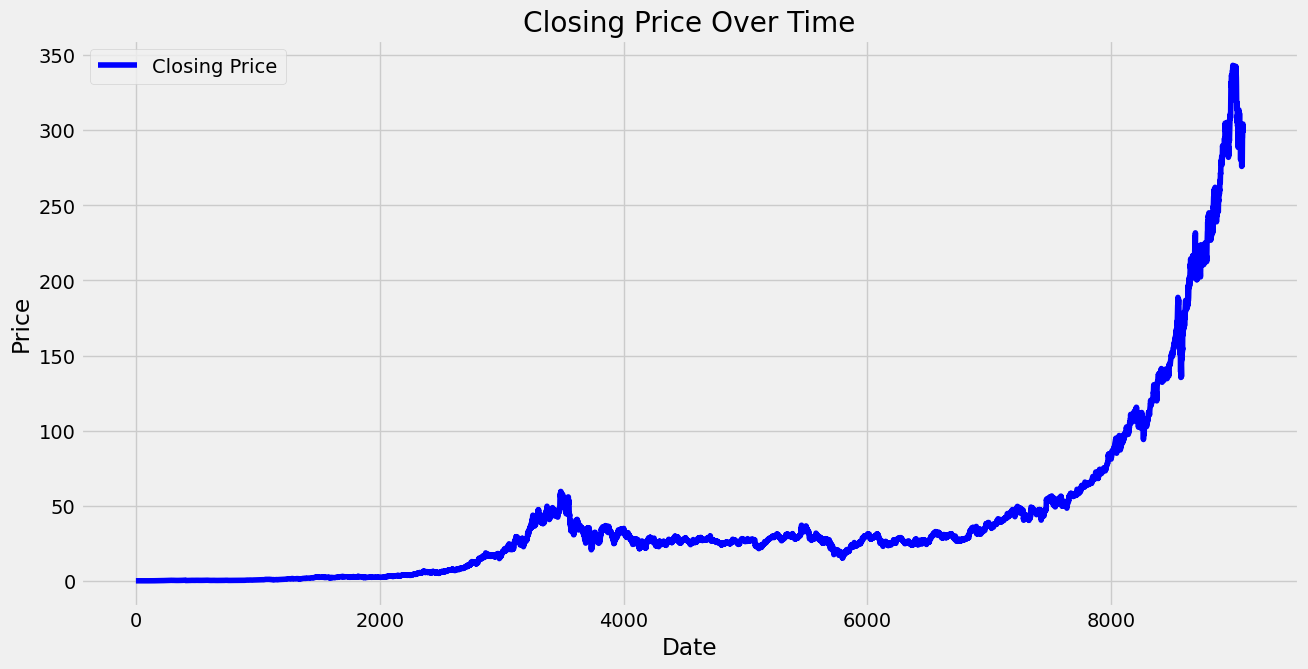

In [7]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
df.shape

(9083, 7)

In [10]:
#new df for only req columns
data=df.filter(["Close"])
dataset=data.values
dataset.shape

(9083, 1)

In [12]:
# Scaling the data
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[-0.69063008],
       [-0.69057193],
       [-0.69054284],
       ...,
       [ 4.39991192],
       [ 4.32337683],
       [ 4.40058194]])

In [13]:
print("Means : ",scaled_data.mean())
print("Standard Deviation : ",scaled_data.std())

Means :  1.0013153162753806e-16
Standard Deviation :  1.0


In [17]:
#preparing training data
train_len=math.ceil(len(dataset)*0.8)
train_len

7267

In [19]:
train_data=scaled_data[0:train_len,:]
train_data.shape

(7267, 1)

In [21]:
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i])

In [25]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(7207, 60, 1)

In [29]:
x_train.shape[1]

60

In [31]:
#RESHAPING
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) 

In [32]:
#build LSTM model
model= Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1)) 

In [33]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 200)        │       161,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 507,601 (1.94 MB)

 Trainable params: 507,601 (1.94 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
#train the model
history = model.fit(x_train,y_train,epochs=5)

Epoch 1/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 22s 85ms/step - loss: 0.0094
Epoch 2/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - loss: 2.3696e-04
Epoch 3/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - loss: 2.1591e-04
Epoch 4/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - loss: 1.8982e-04
Epoch 5/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - loss: 1.6814e-04


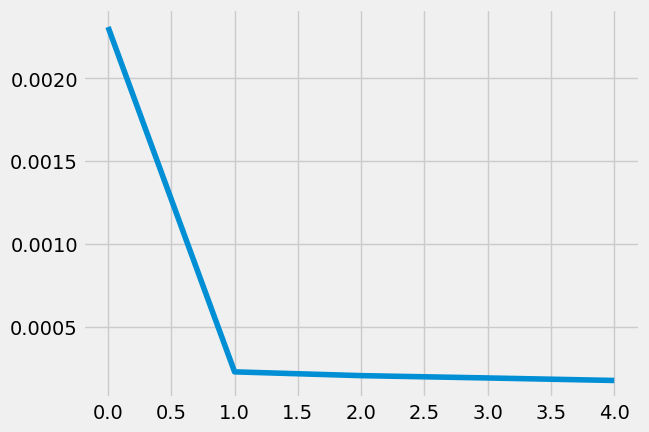

In [38]:
plt.plot(history.history['loss'])

In [49]:
#create the testing dataset
#createt new array
test_data=scaled_data[train_len-60:, :]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[train_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [50]:
#convert the data to numpy 
x_test=np.array(x_test)

In [51]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [52]:
#get the model predicted value
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
print(predictions)

57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step
[[ 46.20905 ]
 [ 46.2905  ]
 [ 46.476784]
 ...
 [247.01291 ]
 [250.41766 ]
 [252.56581 ]]
